In [1]:
# Perform imports and load the dataset:
import pandas as pd

In [2]:
df = pd.read_csv("Processed_Reviews.csv",encoding="ISO-8859-1")
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 13 non-null     object
 1   lowercased             13 non-null     object
 2   urls_removed           13 non-null     object
 3   html_removed           13 non-null     object
 4   emojis_removed         13 non-null     object
 5   slangs_replaced        13 non-null     object
 6   contractions_replaced  13 non-null     object
 7   punctuations_removed   13 non-null     object
 8   numbers_removed        13 non-null     object
 9   spelling_corrected     13 non-null     object
 10  stopwords_removed      13 non-null     object
 11  stemmed_words          13 non-null     object
 12  lemmatized             13 non-null     object
 13  tokenized              13 non-null     object
 14  Label                  13 non-null     int64 
dtypes: int64(1), object(14)
m

In [3]:
# Checking for null values
df.isnull().sum()

Review                   0
lowercased               0
urls_removed             0
html_removed             0
emojis_removed           0
slangs_replaced          0
contractions_replaced    0
punctuations_removed     0
numbers_removed          0
spelling_corrected       0
stopwords_removed        0
stemmed_words            0
lemmatized               0
tokenized                0
Label                    0
dtype: int64

In [4]:
# Checking Duplicate values
df.duplicated().sum()

0

In [5]:
# Drop Duplicate values
df=df.drop_duplicates()
df.shape

(13, 15)

In [6]:
df = df.iloc[:, [14,0]]  # Select first and last columns
df.columns = ['label', 'message']  # Rename columns
df.head()

,label,message
0,1,The product arrived on time. Packaging was gre...
1,1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.
2,1,"I bought this phone for $799, and it has a 120..."
3,0,Wow!!! This product is awesome... but a bit ex...
4,1,The laptop works perfectly fine.


In [7]:
df.describe()
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0           5      5  Wow!!! This product is awesome... but a bit ex...    1
1           8      8  The product arrived on time. Packaging was gre...    1

In [8]:
# convert label to a numerical variable
df['view'] = df.label.map({0:'Negative', 1:'Positive'})
df.head()

,label,message,view
0,1,The product arrived on time. Packaging was gre...,Positive
1,1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,Positive
2,1,"I bought this phone for $799, and it has a 120...",Positive
3,0,Wow!!! This product is awesome... but a bit ex...,Negative
4,1,The laptop works perfectly fine.,Positive


In [9]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,view,message_len
0,1,The product arrived on time. Packaging was gre...,Positive,77
1,1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,Positive,40
2,1,"I bought this phone for $799, and it has a 120...",Positive,75
3,0,Wow!!! This product is awesome... but a bit ex...,Negative,55
4,1,The laptop works perfectly fine.,Positive,38


Text(0.5, 0, 'Message Length')

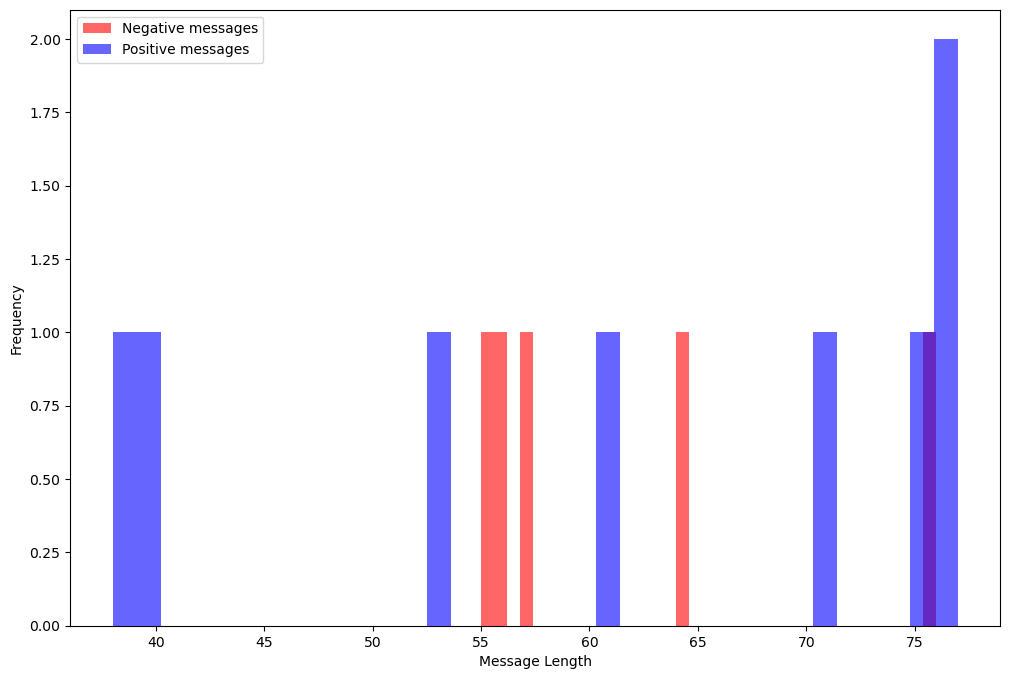

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df[df.view=='Negative'].message_len.plot(bins=35, kind='hist', color='red',
 label='Negative messages', alpha=0.6)
df[df.view=='Positive'].message_len.plot(bins=35, kind='hist', color='blue',
 label='Positive messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [11]:
df[df.label==1].describe()

,label,message_len
count,8.0,8.00000
mean,1.0,61.50000
std,0.0,16.21287
min,1.0,38.00000
25%,1.0,49.75000
50%,1.0,66.00000
75%,1.0,75.50000
max,1.0,77.00000


In [12]:
df[df.label==0].describe()

,label,message_len
count,5.0,5.000000
mean,0.0,61.600000
std,0.0,8.792042
min,0.0,55.000000
25%,0.0,56.000000
50%,0.0,57.000000
75%,0.0,64.000000
max,0.0,76.000000


In [13]:
# import library
import re
import string
import nltk
from nltk.corpus import stopwords

In [14]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
stemmer = nltk.SnowballStemmer("english")

In [15]:
def preprocess(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text) # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text) # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text) # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text

In [16]:
df['message_clean'] = df['message'].apply(preprocess)
df.head(20)
print(df['message_clean'][12])

shoe comfort fit nice work perfect jog


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


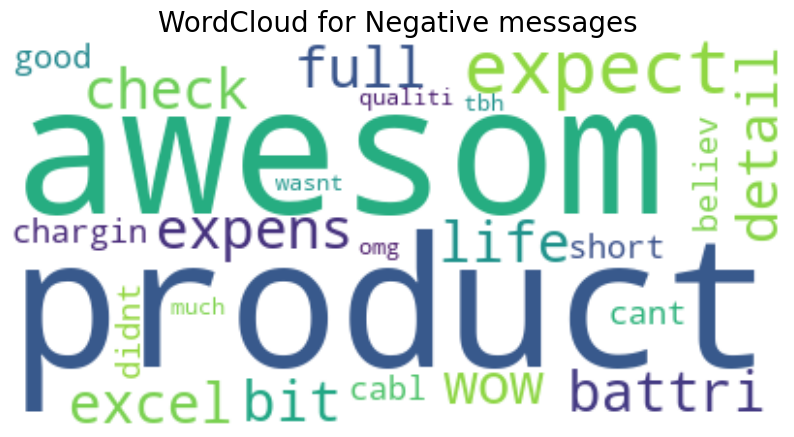

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(
 background_color='white',
max_words=200,
 contour_color='steelblue', # Add contour color
 contour_width=2, # Add contour width
)
# Generate the WordCloud using text data for HAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 0, 'message_clean'])
wc.generate(ham_text)
# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Negative messages', fontsize=20)
plt.axis('off')
plt.show()

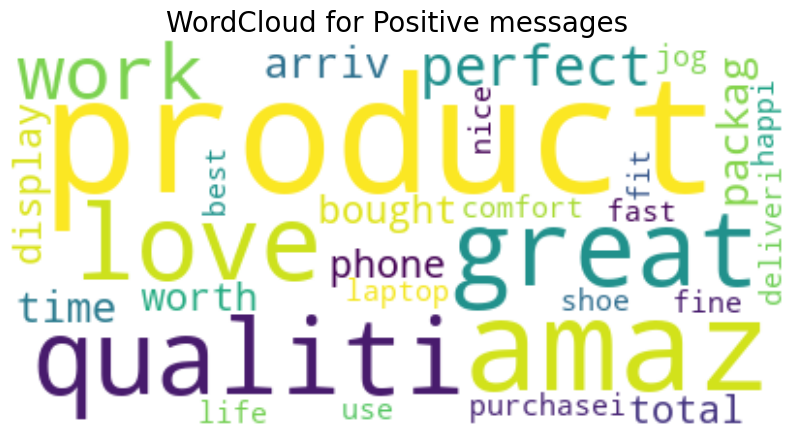

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(
 background_color='white',
 max_words=200,
 contour_color='steelblue', # Add contour color
 contour_width=2, # Add contour width
)
# Generate the WordCloud using text data for SPAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 1, 'message_clean'])
wc.generate(ham_text)
# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Positive messages', fontsize=20)
plt.axis('off')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df['message_clean'])
y = df['label']

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [22]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)
# SVM
svm_clf = SVC(kernel='linear', class_weight='balanced').fit(X_train, y_train)

In [24]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score # Importing accuracy_score
# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)
# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted, zero_division=1)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)

C:\Users\Irfan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Irfan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Irfan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
nb_cm

array([[0, 2],
       [0, 2]], dtype=int64)

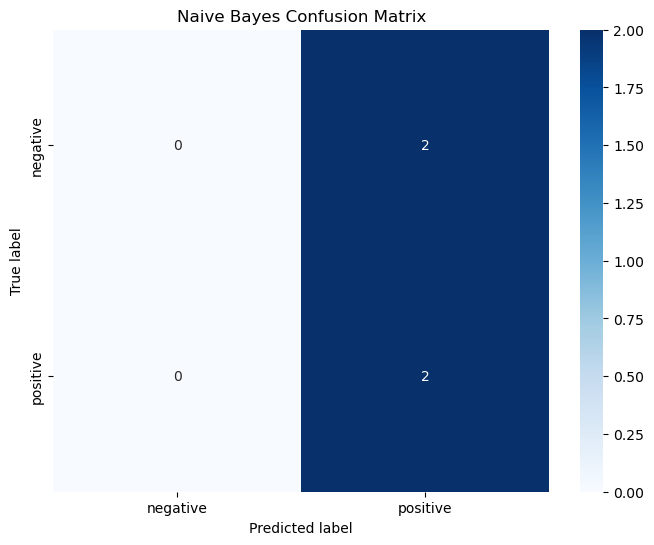

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


Naive Bayes Error Rate: 0.50


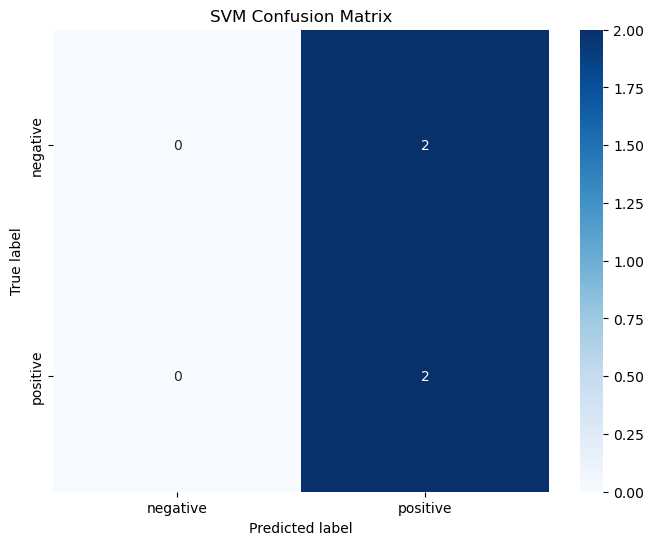


SVM Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.75      0.50      0.33         4
weighted avg       0.75      0.50      0.33         4


SVM Error Rate: 0.50


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes,
yticklabels=classes)
 plt.title(title)
 plt.xlabel('Predicted label')
 plt.ylabel('True label')
 plt.show()
# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')
print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")
# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')
print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")